In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('50_Startups.csv')

In [4]:
df.sample(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
16,78013.11,121597.55,264346.06,California,126992.93
31,61136.38,152701.92,88218.23,New York,97483.56


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:>

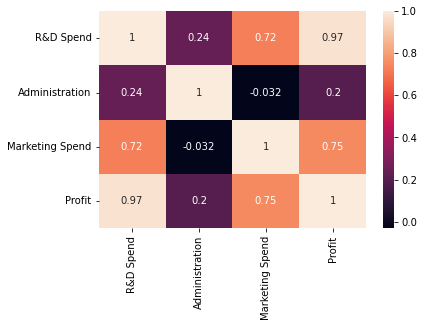

In [7]:
sns.heatmap(df.corr(),annot = True)

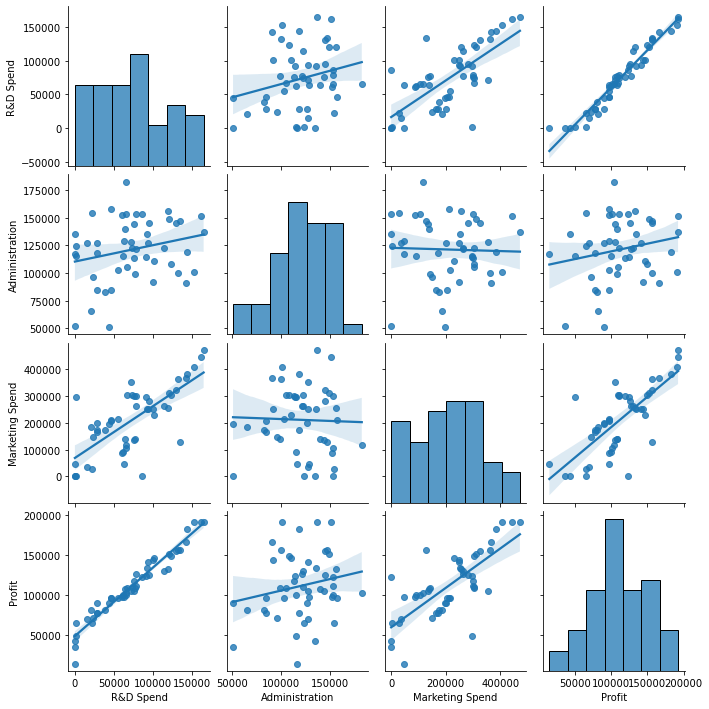

In [8]:
sns.pairplot(data = df, kind = 'reg')

In [9]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [11]:
target = df['Profit']
features = df[['R&D Spend']]         # always dataframe or 2d array

In [15]:
from sklearn.linear_model import LinearRegression
model_simple = LinearRegression().fit(features,target) 

In [17]:
model_simple.score(features,target) * 100

94.65353160804393

In [20]:
from sklearn.preprocessing import PolynomialFeatures as pf

In [27]:
feat_poly1 = pf(degree = 1).fit_transform(features)
feat_poly2 = pf(degree = 2).fit_transform(features)
feat_poly3 = pf(degree = 3).fit_transform(features)
feat_poly4 = pf(degree = 4).fit_transform(features)

In [28]:
print('Model Simple:' , 100* model_simple.score(features, target))

model_poly1 = LinearRegression().fit(feat_poly1, target)
print('Model Poly1:' , model_poly1.score(feat_poly1, target) * 100)

model_poly2 = LinearRegression().fit(feat_poly2, target)
print('Model Poly2:' , model_poly2.score(feat_poly2, target) * 100)

model_poly3 = LinearRegression().fit(feat_poly3, target)
print('Model Poly3:' , model_poly3.score(feat_poly3, target) * 100)

model_poly4 = LinearRegression().fit(feat_poly4, target)
print('Model Poly4:' , model_poly4.score(feat_poly4, target) * 100)

Model Simple: 94.65353160804393
Model Poly1: 94.65353160804393
Model Poly2: 94.67036529091331
Model Poly3: 95.40709421372246
Model Poly4: 93.38075489405617
